In [1]:
from datetime import timedelta
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import transformation
import data_filter as dafi
import estimate_height as esth



In [2]:
import math
x = 4155252.3307
y = 674064.7850
z = 4775969.2638
lat,lon,height = transformation.xyz2latlon(x,y,z)
print(lat/math.pi*180)
print(lon/math.pi*180)
print(height)

48.797647635874426
9.214252131825374
270.97025138139725


In [12]:
main_path = 'E:/OneDrive/Studium/MA/data/20220526/2/'
main_path = os.path.abspath('../data/20220526/2/')
print(main_path)

#main_path = 'E:/OneDrive/Studium/MA/data/20220526/3/'

data_dict = dafi.generate_dataframe(main_path)
satellite_list = data_dict.keys()

azimut_mask = [140,320]
elevation_mask = [0,60]
for satellite_code in satellite_list:
    data_dict[satellite_code] = dafi.azimut_filter(data_dict[satellite_code],azimut_mask)
    data_dict[satellite_code] = dafi.elevation_filter(data_dict[satellite_code],elevation_mask)

/Users/ziqing/Documents/GitHub/gnss_ir_analyze/data/20220526/2


In [13]:
print(satellite_list)

dict_keys(['G01', 'G03', 'G04', 'G06', 'G09', 'G17', 'G19', 'G31', 'G11', 'G02', 'R04', 'R05', 'R06', 'R14', 'R15', 'R20', 'R21', 'R22', 'R07', 'E04', 'E05', 'E09', 'E11', 'E36', 'E34', 'E01', 'G07', 'E31', 'G20', 'G16', 'G30', 'R23', 'R09'])


In [21]:
satellite_code = 'G01'
dataframe = data_dict[satellite_code]
print(dataframe)


                          time   azimut  elevation   snr1   snr2
0    2022-05-26 19:31:05+00:00  150.067     24.358  43.80  43.40
1    2022-05-26 19:31:06+00:00  150.070     24.350  43.75  43.60
2    2022-05-26 19:31:07+00:00  150.072     24.343  44.10  44.10
3    2022-05-26 19:31:08+00:00  150.075     24.336  43.95  43.85
4    2022-05-26 19:31:09+00:00  150.077     24.328  43.95  43.80
...                        ...      ...        ...    ...    ...
3495 2022-05-26 20:29:20+00:00  155.900      0.030    NaN    NaN
3496 2022-05-26 20:29:21+00:00  155.901      0.024    NaN    NaN
3497 2022-05-26 20:29:22+00:00  155.902      0.017    NaN    NaN
3498 2022-05-26 20:29:23+00:00  155.903      0.010    NaN    NaN
3499 2022-05-26 20:29:24+00:00  155.904      0.004    NaN    NaN

[3500 rows x 5 columns]


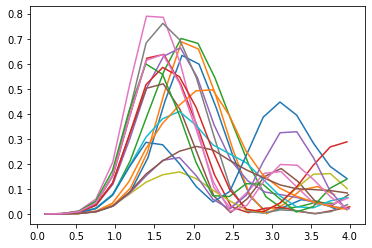

In [26]:
min_height = 1
max_height = 3 # meter
time_interval = 2 # minutes

if not dataframe.empty:
    time_list, height_list, azimut_list = esth.split_result(dataframe,time_interval,min_height,max_height)


/Users/ziqing/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


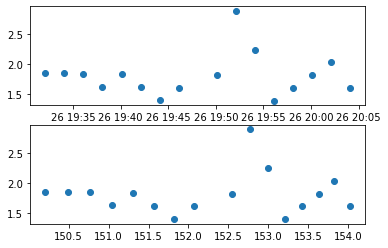

In [25]:
plt.subplot(2,1,1)
plt.scatter(time_list,height_list)
plt.subplot(2,1,2)
plt.scatter(azimut_list,height_list)

In [ ]:
for satellite_code in data_dict:
    dataframe = data_dict[satellite_code]
    if not dataframe.empty:
        time_list, height_list, azimut_list = esth.split_result(dataframe,time_interval,min_height,max_height)